<a href="https://colab.research.google.com/github/josehelioaraujo/Grupo51_TechChallenge_fase2/blob/main/Grupo51_TechChallenge_fase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado do Problema

**Objetivo**

> Este projeto tem como objetivo a solução de um problema relacionado ao **Tech Challenge Fase 2**, do curso de **Pós Graduação de Inteligência Artificial para Desenvolvedores** da Fiap.

**Definição do problema**

- Escolha um problema real que possa ser resolvido por meio de otimização genética.
- Descreva o problema, os objetivos e os critérios de sucesso.

**Testes e Resultados**
 - Realize testes para testar a eficácia do algorítimo.

**Documentação**
Forneça uma documentação completa do projeto incluindo:
- Descrição do problema
- Detalhes da implementação do algorítmo
- Análise dos resultados
- Conclusões.

**Solução Escolhida**

- Escolhemos resolver o problema de **otimização de rotas**, utilizando um algoritmo genético, e que usa um dataset estático, com localização geográfica de todas as cidades do Brasil,
que pode ser aplicado em empresas de **logísticas**, **entregas de produtos**, que são amplamente usados em empresa de diversas áreas, tais como, **e-commerce**, **varejo em geral**, ou em outras cenários, que requeiram algum tipo de otimização complexa.






# Entregável
**Participantes do Grupo 51**

- **RM 355027 - José Hélio Araújo Andrade**

- **RM 356210 - Bernado Guimarães Tinti**

**Links de referências**

- [Video de apresentação no Youtube](https://www.youtube.com/watch?v=7GNJm2SqVs8)

- [Repositório Github](https://github.com/josehelioaraujo/Grupo51_TechChallenge_fase2/blob/main/Grupo51_TechChallenge_fase2.ipynb)

- [DataSet das cidades do Brasil obtido do Kaggle](https://www.kaggle.com/datasets/gilbertotrindade/cidades-brasileiras?resource=download)

# Fluxograma do Algoritmo Genético

 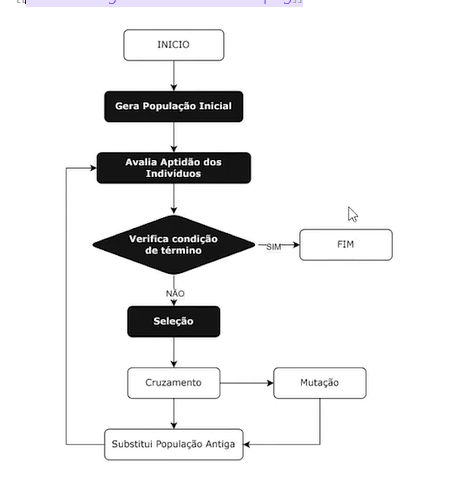

  Este fluxograma ilustra o processo do nosso algoritmo genético.
   Vamos percorrê-lo passo a passo:

   1. **Início:** O algoritmo começa sua jornada.
   
   2. **Gera População Inicial:** Criamos um conjunto de rotas aleatórias. Pense nisso como criar vários mapas diferentes com rotas entre as cidades.
   
   3. **Avalia Aptidão dos Indivíduos:** Analisamos quão boa cada rota é, considerando fatores como a melhor distância total entre as cidades.
   
   4. **Verifica Condição de Término:** Checamos se encontramos uma rota boa o suficiente ou se atingimos o número máximo de tentativas.
   
   5. **Seleção:** Se não terminamos, escolhemos as melhores rotas para 'sobreviver' à próxima geração.
   
   6. **Cruzamento:** Combinamos as melhores rotas para criar novas, potencialmente melhores.
   
   7. **Mutação:** Fazemos pequenas alterações aleatórias nas novas rotas para explorar novas possibilidades.
   
   8. **Substitui População Antiga:** As novas rotas substituem as antigas, e voltamos ao passo de avaliação.

   Este processo se repete até encontrarmos uma solução satisfatória ou atingirmos o limite de tentativas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importação de Bibliotecas


In [ ]:
# instalação de libs
!pip install deap folium ipywidgets

import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
import random
from math import radians, sin, cos, sqrt, atan2
import folium
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML
import time
import matplotlib.pyplot as plt


In [ ]:
# Definição de variáveis globais
LIMITE_MAXIMO_CIDADES_FORCA_BRUTA = 10
TAMANHO_MAXIMO_POPULACAO = 200
LIMITE_MAXIMO_DE_GERACOES = 100
NUMERO_MINIMO_CIDADES = 2


# Carregando a Base de Dados

Dataset com localização de todas as cidades brasileiras(contendo latitude e longitude), obtido da Plataforma [Kaggle](https://colab.research.google.com/drive/1CzJozb4ODW4x3eoo89dBhHQgHiecXiJx#scrollTo=lal5IWWFpKFi&line=3&uniqifier=1)


In [ ]:
# Carregando o dataset
df = pd.read_csv('sample_data/BrazilianCities.csv')

# Análise exploratória do dataset
- Contém 5570 cidades
- Não existem registros nulos
- Existem 27 estados
- Exibição do gráfico de destribuição de quantidade de cidades por estado


In [ ]:
df.head()

,ID,Cidade,Estado,Sigla,IBGE,Latitude,Longitude
0,1,ABADIA DE GOIÁS,GOIÁS,GO,5200050,-16.757264,-49.441220
1,2,ABADIA DOS DOURADOS,MINAS GERAIS,MG,3100104,-18.491063,-47.406365
2,3,ABADIÂNIA,GOIÁS,GO,5200100,-16.194723,-48.706812
3,4,ABAETÉ,MINAS GERAIS,MG,3100203,-19.156683,-45.448121
4,5,ABAETETUBA,PARÁ,PA,1500107,-1.721828,-48.878843


In [ ]:
# Informações sobre o dataset
# Contém 5570 cidades
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5570 non-null   int64  
 1   Cidade     5570 non-null   object 
 2   Estado     5570 non-null   object 
 3   Sigla      5570 non-null   object 
 4   IBGE       5570 non-null   int64  
 5   Latitude   5570 non-null   float64
 6   Longitude  5570 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 304.7+ KB


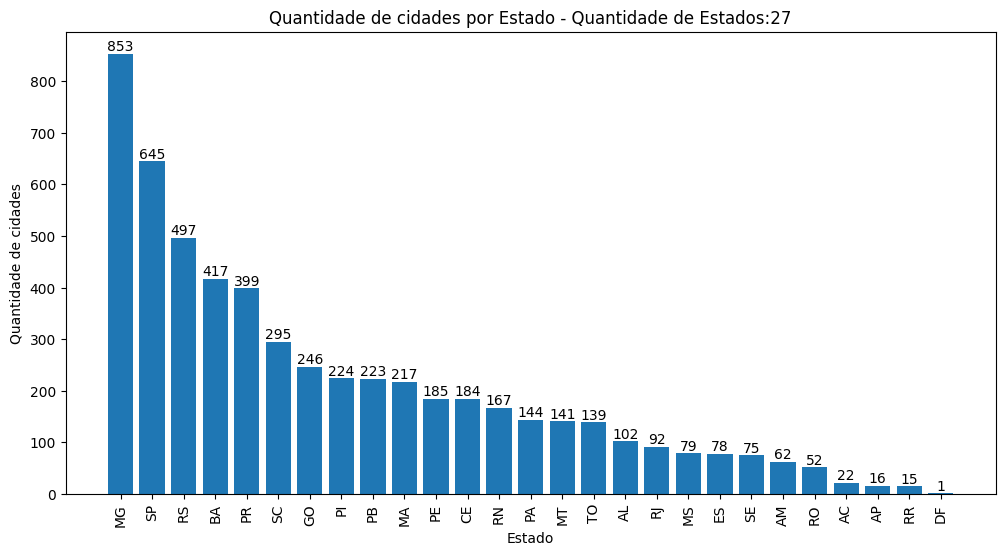

In [ ]:
# Contagem de cidades por estado
cidades_por_estado = df.groupby('Sigla')['Cidade'].count().sort_values(ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(cidades_por_estado.index, cidades_por_estado.values)

# Adicionar rótulos
plt.xlabel('Estado')
plt.ylabel('Quantidade de cidades')
plt.title('Quantidade de cidades por Estado - Quantidade de Estados:'+ str(len(cidades_por_estado)))

# Adicionar quantidade de cidades em cada barra
for i, valor in enumerate(cidades_por_estado.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Aumentar dimensão do eixo x
plt.xticks(rotation=90)

# Exibir gráfico
plt.show()


# Funções diversas

**Funções usadas no Algorítmo Genético**
- Inicialização do algorítmo genético
- Função a fim de avaliar o Otimizador de Rotas
- Função para criar a matriz de distâncias
- Função para calcular a distância Haversine
- Função para executar o algoritmo genético
- Função para criar a permutação de uma lista
- Implementação do algoritmo de força bruta

**Funções da Interface Visual**
- Função para visualizar a rota no mapa
- Função para plotar o gráfico de convergência
- Função para executar o otimização das cidades selecionadas conforme a quantidade de gerações

**Observações:**

Para o cálculo de distância, usamos o método de **distância Haversine**.

- É um método para calcular a distância entre dois pontos na superfície de uma esfera, como a Terra, usando suas coordenadas de latitude e longitude.

**Em Resumo:**

- É usada para medir distâncias **"great-circle**" na Terra
Leva em conta a curvatura da Terra
Fornece resultados mais precisos que cálculos em um plano 2D
- É comumente usada em **navegação, GPS e aplicações geoespaciai**s
- Usa uma fórmula trigonométrica específica para o cálculo;

- É mais precisa para calcular distâncias na superfície terrestre do que métodos que tratam a Terra como um plano.

- **Fôrmula do cálculo da distância Haversine**:

    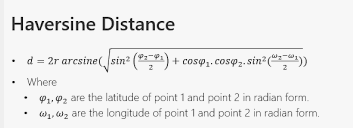

    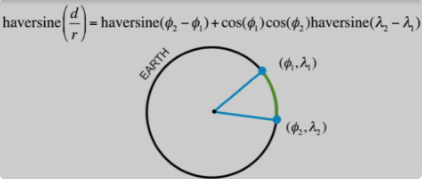


In [ ]:
# Funções diversas

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Inicialização do algorítmo genético
def init_ga(n_cities):
    """
    Inicializa os componentes do algoritmo genético, registrando os operadores genéticos
    e os métodos de criação e manipulação da população.

    Args:
        n_cities (int): Número de cidades para o problema do Otimizador de Rotas
    """
    toolbox.register("indices", random.sample, range(n_cities), n_cities)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

# Avaliação do Otimizador de Roras
def evalTSP(individual, distance_matrix):
  """
    Avalia um indivíduo para o problema do Otimizador de Rotas, calculando a distância total da rota.

    Args:
        individual (list): Lista de índices representando a ordem das cidades na rota.
        distance_matrix (ndarray): Matriz de distâncias entre as cidades.

    Returns:
        tuple: Distância total da rota.
    """
  distance = distance_matrix[individual[-1]][individual[0]]
  for i in range(len(individual) - 1):
      distance += distance_matrix[individual[i]][individual[i+1]]
  return distance,

# Função para gerar a permutação de uma lista
def permutation(lst):
    """
    Gera todas as permutações possíveis de uma lista.

    Args:
        lst (list): Lista de elementos para permutar.

    Returns:
        list: Lista de listas contendo todas as permutações possíveis.
    """
    if len(lst) == 0:
        return []
    if len(lst) == 1:
        return [lst]
    l = []
    for i in range(len(lst)):
        m = lst[i]
        remLst = lst[:i] + lst[i+1:]
        for p in permutation(remLst):
            l.append([m] + p)
    return l

# Função para calcular a distância Haversine
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calcula a distância Haversine entre dois pontos geográficos.

    Args:
        lat1 (float): Latitude do primeiro ponto.
        lon1 (float): Longitude do primeiro ponto.
        lat2 (float): Latitude do segundo ponto.
        lon2 (float): Longitude do segundo ponto.

    Returns:
        float: Distância Haversine entre os dois pontos em quilômetros.
    """
    R = 6371  # raio da Terra em km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Implementação do algoritmo de força bruta
def brute_force_tsp(distance_matrix):
    """
    Resolve o problema do caixeiro viajante contínuo (CTSP)
    utilizando uma abordagem de força bruta, testando todas
    as permutações possíveis das cidades.

    Args:
        distance_matrix (ndarray): Matriz de distâncias entre as cidades.

    Returns:
        tuple: Melhor rota encontrada e a distância correspondente.
    """
    n = len(distance_matrix)
    all_permutations = permutation(list(range(n)))
    best_route = None
    best_distance = float('inf')

    for perm in all_permutations:
        distance = sum(distance_matrix[perm[i]][perm[i+1]] for i in range(n-1))
        distance += distance_matrix[perm[-1]][perm[0]]  # Retorno à cidade inicial
        if distance < best_distance:
            best_distance = distance
            best_route = perm

    return best_route, best_distance

# Função para executar o algoritmo genético
def run_ga(distance_matrix, pop_size=TAMANHO_MAXIMO_POPULACAO, n_generations=LIMITE_MAXIMO_DE_GERACOES, crossover_prob=0.7, mutation_prob=0.2):
    """
    Executa o algoritmo genético para resolver o problema do Otimizador de rotas.

    Args:
        distance_matrix (ndarray): Matriz de distâncias entre as cidades.
        pop_size (int): Tamanho da população.
        n_generations (int): Número de gerações.
        crossover_prob (float): Probabilidade de cruzamento.
        mutation_prob (float): Probabilidade de mutação.

    Returns:
        tuple: Melhor indivíduo encontrado e o log do processo evolutivo.
    """
    toolbox.register("evaluate", evalTSP, distance_matrix=distance_matrix)

    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_prob, mutpb=mutation_prob,
                                   ngen=n_generations, stats=stats, halloffame=hof, verbose=True)

    return hof[0], log

# Função para criar a matriz de distâncias
def create_distance_matrix(cities):
    """
    Cria uma matriz de distâncias utilizando a fórmula de Haversine entre as cidades.

    Args:
        cities (DataFrame): DataFrame contendo as cidades com suas respectivas latitudes e longitudes.

    Returns:
        ndarray: Matriz de distâncias entre as cidades.
    """
    n_cities = len(cities)
    distance_matrix = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        for j in range(i+1, n_cities):
            dist = haversine_distance(
                cities.iloc[i]['Latitude'],
                cities.iloc[i]['Longitude'],
                cities.iloc[j]['Latitude'],
                cities.iloc[j]['Longitude']
            )
            distance_matrix[i][j] = dist
            distance_matrix[j][i] = dist
    return distance_matrix

# Função para visualizar a rota no mapa
def plot_route(cities, route):
    """
    Plota a rota das cidades em um mapa utilizando Folium.

    Args:
        cities (DataFrame): DataFrame contendo as cidades com suas respectivas latitudes e longitudes.
        route (list): Lista de índices representando a ordem das cidades na rota.

    Returns:
        folium.Map: Mapa com a rota plotada.
    """
    m = folium.Map(location=[cities['Latitude'].mean(), cities['Longitude'].mean()], zoom_start=4, width="80%")

    # Adicionar marcadores para cada cidade
    for i, city in cities.iterrows():
        folium.Marker(
            [city['Latitude'], city['Longitude']],
            popup=city['Cidade'],
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

    # Adicionar linhas conectando as cidades na ordem da rota
    route_coords = [(cities.iloc[i]['Latitude'], cities.iloc[i]['Longitude']) for i in route]
    route_coords.append(route_coords[0])  # Fechar o ciclo
    folium.PolyLine(route_coords, color="blue", weight=2.5, opacity=0.8).add_to(m)

    return m

# Função para plotar o gráfico de convergência
def plot_convergence(log):
    """
    Plota o gráfico de convergência do algoritmo genético.

    Args:
        log (deap.tools.Logbook): Log do processo evolutivo.
    """
    gen = log.select("gen")
    min_fits = log.select("min")
    avg_fits = log.select("avg")

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(gen, min_fits, 'b-', label="Melhor fitness")
    ax.plot(gen, avg_fits, 'r-', label="Fitness médio")
    ax.set_xlabel("Geração")
    ax.set_ylabel("Fitness (Distância)")
    ax.legend(loc="upper right")
    ax.set_title("Convergência do Algoritmo Genético")
    plt.show()

# Função para executar o otimização das cidades selecionadas conforme a qtde de gerações
def run_optimization(selected_cities, n_generations):
    """
    Executa a otimização das cidades selecionadas utilizando algoritmo genético
    e, opcionalmente, força bruta para comparação.

    Args:
        selected_cities (list): Lista de nomes das cidades selecionadas.
        n_generations (int): Número de gerações para o algoritmo genético.
    """
    if len(selected_cities) < NUMERO_MINIMO_CIDADES:
        print(f"Por favor, selecione pelo menos {NUMERO_MINIMO_CIDADES} cidades.")
        return

    selected_df = df[df['Cidade'].isin(selected_cities)].reset_index(drop=True)
    distance_matrix = create_distance_matrix(selected_df)

    print("Cidades selecionadas:")
    print(selected_df[['Cidade', 'Latitude', 'Longitude']])

    print(distance_matrix)
    init_ga(len(selected_cities))

    start_time = time.time()
    best_route_ga, log = run_ga(distance_matrix, n_generations=n_generations)
    ga_time = time.time() - start_time

    ga_distance = evalTSP(best_route_ga, distance_matrix)[0]

    print(f"Algoritmo Genético - Melhor distância: {ga_distance:.2f} km")
    print(f"Tempo de execução do AG: {ga_time:.2f} segundos")

    best_route_names = [selected_df.iloc[i]['Cidade'] for i in best_route_ga]
    print("Rota do AG:", ' -> '.join(best_route_names))

    # Executar força bruta apenas se o número de cidades for menor ou igual a LIMITE_MAXIMO_CIDADES_FORCA_BRUTA
    if len(selected_cities) <= LIMITE_MAXIMO_CIDADES_FORCA_BRUTA:
        start_time = time.time()
        best_route_bf, bf_distance = brute_force_tsp(distance_matrix)
        bf_time = time.time() - start_time

        print(f"\nForça Bruta - Melhor distância: {bf_distance:.2f} km")
        print(f"Tempo de execução da Força Bruta: {bf_time:.2f} segundos")

        best_route_names_bf = [selected_df.iloc[i]['Cidade'] for i in best_route_bf]
        print("Rota da Força Bruta:", ' -> '.join(best_route_names_bf))
    else:
        print(f"\nForça Bruta não executada devido ao alto número de cidades (>{LIMITE_MAXIMO_CIDADES_FORCA_BRUTA}).")

    # Visualizar a rota no mapa
    m = plot_route(selected_df, best_route_ga)
    display(m)

    # Plotar gráfico de convergência
    plot_convergence(log)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# Implementação do Algorítmo Genético


# Interface visual e interativa

- Função para visualizar a rota no mapa
- Função para plotar o gráfico de convergência

**Ações:**
- Input para digitação da quantidade de gerações
- Widget para seleção de cidades
- Botão 'Executar Otimização'


# Input da quantidade de gerações

In [ ]:
3# Input da quantidade de gerações
n_generations_input = input("Digite o número de gerações: ")
n_generations = int(n_generations_input) if n_generations_input.isdigit() else LIMITE_MAXIMO_DE_GERACOES

Digite o número de gerações: 200


In [ ]:
# Widget para seleção de cidades
city_selector = widgets.SelectMultiple(
    options=df['Cidade'].tolist(),
    description='Selecione as cidades:',
    disabled=False,
    layout={'height':'500px', 'width':'40%'}
)

run_button = widgets.Button(description="Executar Otimização")
output = widgets.Output()

def on_button_clicked(_):
    with output:
        output.clear_output()
        print("Executando otimização...")
        run_optimization(city_selector.value, n_generations)

run_button.on_click(on_button_clicked)

display(city_selector)
display(run_button)
display(output)

SelectMultiple(description='Selecione as cidades:', layout=Layout(height='500px', width='40%'), options=('ABAD…

Button(description='Executar Otimização', style=ButtonStyle())

Output()

## Comparando com Algoritmo Convencional
- Foram executados testes com diferentes parâmetros, a fim de comparar os resultados obtidos com os dois tipos de algoritmos (**genético e força bruta**)

---


- Os resultados desses testes foram compilados em tabelas, a fim de melhor comparação e renderização gráfica

- Os dados presentes na tabela são referentes ao tempo de processamento, de cada algoritmo, medido em segundos, de acordo com o número de cidades.

In [ ]:
#Tempo em segundos para realizar o proicessamento de acordo com o número de cidades
#Usando sempre 100 gerações

data = {'Algoritmo Genético':[0, 0, 1.31, 0.85, 1.1, 1.15, 0.97, 1.1, 1.03, 1.07, 1.65, 1.24],
        'Força Bruta':[0, 0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.27, 3.74, 49.2, 525.46 ]}

# Create DataFrame
df = pd.DataFrame(data)

# Foi realizada a remoção das duas primeiras linhas do dataframe
# pois a busca pela melhor rota é feita a partir de duas cidades ou mais
df = df.drop(0)
df = df.drop(1)

df.head(11)

,Algoritmo Genético,Força Bruta
2,1.31,0.01
3,0.85,0.01
4,1.10,0.01
5,1.15,0.01
6,0.97,0.01
7,1.10,0.03
8,1.03,0.27
9,1.07,3.74
10,1.65,49.20
11,1.24,525.46


In [ ]:
# Sempre com 205 cidades

dataTests = {'Número Gerações':[10, 50, 100, 200, 300, 500, 1000, 3000],
        'Distancia':[243433.7, 196615.55, 160217.49, 129163.83, 110642.22, 94369.92, 64457.36, 57998.4]}

# Create DataFrame
df_g = pd.DataFrame(dataTests)

df_g.head(10)

,Número Gerações,Distancia
0,10,243433.70
1,50,196615.55
2,100,160217.49
3,200,129163.83
4,300,110642.22
5,500,94369.92
6,1000,64457.36
7,3000,57998.40


- Na tabela em sequência são dispostos os dados do teste com diferentes número de gerações comparando a melhor distância em quilômetros de cada resultado.
- Foi testado a partir de **10 gerações até 3000**, sempre usando as mesmas **205** primeiras cidades.

# Análises dos resultados


- No gráfico em sequência observamos a comparação entre os tempos de execução de cada algoritmo comparada ao número de cidades.

- Nele podemos conferir que a partir de **8 cidades**, o algoritmo genético demonstra bem mais eficiente do que o de força bruta, em que o genético consegue manter o tempo de processamento constante numa ***média de 1 segundo***, enquanto o de ***força bruta.  demonstra uma crescente de ordem exponencial***.


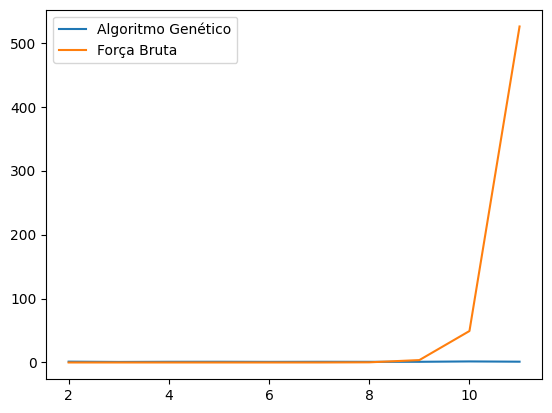

In [ ]:
# traços vermelhos, quadrados azuis e triângulos verdes
plt.plot(df['Algoritmo Genético'], label="Algoritmo Genético")
plt.plot(df['Força Bruta'], label="Força Bruta")
plt.legend()
plt.show()

No gráfico em sequência é possível conferir a comparação do resultado de menor distância obtida.

Nela podemos conferir que, para um grande número de cidades, como no teste realizado (205 cidades), quanto maior o número de gerações do algoritmo, melhor o resultado obtido, entretanto, maior o tempo para que o algoritmo chegue em um resultado satisfatório.

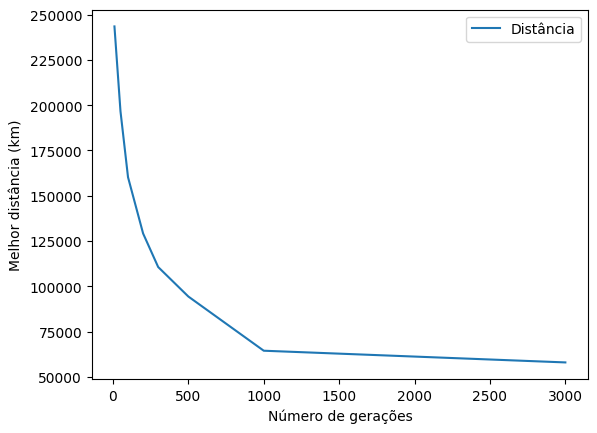

In [ ]:
plt.plot(df_g['Número Gerações'], df_g['Distancia'], label="Distância")
plt.ylabel('Melhor distância (km)')
plt.xlabel('Número de gerações')
plt.legend()
plt.show()

Em outros testes realizados, com um menor número de cidades, foi possível conferir que o número de gerações não faz diferença.

Podemos tirar uma prova disso ao notar, no gráfico em sequência, o qual foi realizado o mesmo teste anterior,  com apenas **5 cidades**.

Nele podemos concluir que não faz diferença o número de gerações configuradas.

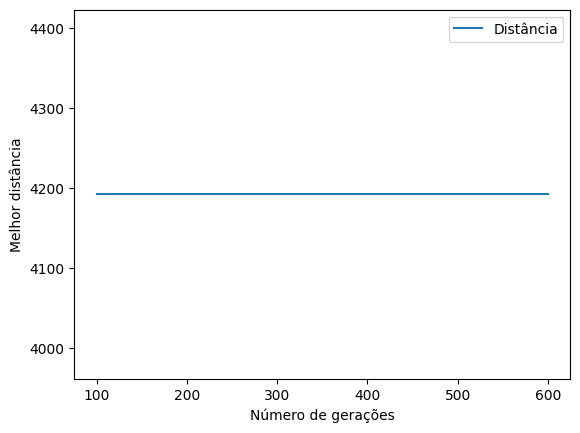

In [ ]:
# Sempre com 5 cidades

df_f = {'Número Gerações':[100, 200, 300, 400, 500, 600],
        'Distancia':[4192.21, 4192.21, 4192.21, 4192.21, 4192.21, 4192.21]}

# Create DataFrame
df_f = pd.DataFrame(df_f)

plt.plot(df_f['Número Gerações'], df_f['Distancia'], label="Distância")
plt.ylabel('Melhor distância')
plt.xlabel('Número de gerações')
plt.legend()
plt.show()

# Conclusões

Após realizados os testes com diferentes entradas, diferentes números de cidades, e diferentes algoritmos, é possível concluir que:

- O número de gerações, não fez grande diferença para o algoritmo utilizado, todos se mantiveram no mesmo padrão.

- Além disso foi possível constatar que, o algoritmo de força bruta teve um tempo menor de processamento para os casos com poucas cidades, até 8 cidades.

- Entretanto, o algorítmo genético manteve a constância do tempo de execução mesmo com uma maior quantidades de cidades, dessa forma, para um maior número de cidades o algoritmo genético consegue se sair melhor do que o de força bruta.

# Recursos adicionais


 - [Conversor texto para audio usado na narração do video](https://crikk.com/text-to-speech/portuguese/)
 - **OBS Studio** - usado na gravação do video de apresentação.
 - **DaVinci Resolve** - usado na montagem e edição do video de apresentação.
 - Os arquivos da narração e video de apresentação estão no [repositório](https://github.com/josehelioaraujo/Grupo51_TechChallenge_fase2/tree/main) do Github.